# Predicting Stock Price for Firms in Information Technology and Health Care Sectors

### Data Pre-Processing & Preliminary Examination:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [66]:
#load dataset
df_path = '/content/final_df.xlsx'
df = pd.read_excel(df_path)
df.head()

,Company Name,Exchange:Ticker,Tickers only,Industry Classifications,Industry Classifications.1,FQ -,DPS Actual,EPS Actual,EPS Forecast,Free Cash Flow Actual,Price Close
0,3M Company (NYSE:MMM),NYSE:MMM,MMM,Industrials (Primary),Industrials,1,0.70,1.93,1.68,752.0,248.50
1,3M Company (NYSE:MMM),NYSE:MMM,MMM,Industrials (Primary),Industrials,2,1.51,2.39,2.11,392.0,376.04
2,3M Company (NYSE:MMM),NYSE:MMM,MMM,Industrials (Primary),Industrials,3,1.50,2.42,2.31,1628.0,106.07
3,3M Company (NYSE:MMM),NYSE:MMM,MMM,Industrials (Primary),Industrials,4,1.50,2.68,2.35,1505.0,109.32
4,3M Company (NYSE:MMM),NYSE:MMM,MMM,Industrials (Primary),Industrials,5,1.50,2.17,1.76,1132.0,93.62


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company Name                1102 non-null   object 
 1   Exchange:Ticker             1102 non-null   object 
 2   Tickers only                1102 non-null   object 
 3   Industry Classifications    1102 non-null   object 
 4   Industry Classifications.1  1102 non-null   object 
 5   FQ -                        1102 non-null   int64  
 6   DPS Actual                  1102 non-null   float64
 7   EPS Actual                  1102 non-null   float64
 8   EPS Forecast                1102 non-null   float64
 9   Free Cash Flow Actual       1102 non-null   float64
 10  Price Close                 1096 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 94.8+ KB


In [7]:
#drop rows with null values
df = df.dropna()

In [8]:
#filter to only include industry IT and Industrial
df = df[(df['Industry Classifications.1'] == 'Health Care') | (df['Industry Classifications.1'] == 'Information Technology')]

In [9]:
#create earning surprise column
df['Earnings Surprise'] = df['EPS Actual'] - df['EPS Forecast']

In [10]:
#final dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 38 to 1101
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company Name                529 non-null    object 
 1   Exchange:Ticker             529 non-null    object 
 2   Tickers only                529 non-null    object 
 3   Industry Classifications    529 non-null    object 
 4   Industry Classifications.1  529 non-null    object 
 5   FQ -                        529 non-null    int64  
 6   DPS Actual                  529 non-null    float64
 7   EPS Actual                  529 non-null    float64
 8   EPS Forecast                529 non-null    float64
 9   Free Cash Flow Actual       529 non-null    float64
 10  Price Close                 529 non-null    float64
 11  Earnings Surprise           529 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 53.7+ KB


In [11]:
df.columns

Index(['Company Name', 'Exchange:Ticker', 'Tickers only',
       'Industry Classifications', 'Industry Classifications.1', 'FQ -',
       'DPS Actual', 'EPS Actual', 'EPS Forecast', 'Free Cash Flow Actual',
       'Price Close', 'Earnings Surprise'],
      dtype='object')

In [12]:
len(df['Company Name'].unique())

28

## Exploratory Data Analysis

In [13]:
df.head()

,Company Name,Exchange:Ticker,Tickers only,Industry Classifications,Industry Classifications.1,FQ -,DPS Actual,EPS Actual,EPS Forecast,Free Cash Flow Actual,Price Close,Earnings Surprise
38,Abbott Laboratories (NYSE:ABT),NYSE:ABT,ABT,Health Care (Primary),Health Care,1,0.55,1.14,1.110,1427.0,114.01,0.030
39,Abbott Laboratories (NYSE:ABT),NYSE:ABT,ABT,Health Care (Primary),Health Care,2,0.55,0.98,0.953,627.0,103.91,0.027
40,Abbott Laboratories (NYSE:ABT),NYSE:ABT,ABT,Health Care (Primary),Health Care,3,0.55,1.19,1.190,2283.0,113.66,0.000
41,Abbott Laboratories (NYSE:ABT),NYSE:ABT,ABT,Health Care (Primary),Health Care,4,0.51,1.14,1.100,1317.0,110.07,0.040
42,Abbott Laboratories (NYSE:ABT),NYSE:ABT,ABT,Health Care (Primary),Health Care,5,0.51,1.08,1.050,696.0,96.85,0.030


In [14]:
columns_of_interest = ['DPS Actual', 'EPS Actual', 'EPS Forecast', 'Free Cash Flow Actual',
                       'Price Close', 'Earnings Surprise']
for column in columns_of_interest:
    max_value = round(df[column].max(), 2)
    min_value = round(df[column].min(), 2)
    mean_value = round(df[column].mean(), 2)

    print(f"{column} - Max: {max_value}, Min: {min_value}, Average: {mean_value}")


DPS Actual - Max: 1.45, Min: 0.0, Average: 0.45
EPS Actual - Max: 7.38, Min: -0.28, Average: 1.76
EPS Forecast - Max: 7.09, Min: -0.63, Average: 1.64
Free Cash Flow Actual - Max: 44163.0, Min: -9198.0, Average: 2671.0
Price Close - Max: 1300.27, Min: 15.51, Average: 203.16
Earnings Surprise - Max: 1.33, Min: -0.49, Average: 0.12


In [15]:
df.describe()

,FQ -,DPS Actual,EPS Actual,EPS Forecast,Free Cash Flow Actual,Price Close,Earnings Surprise
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,10.049149,0.452614,1.758285,1.641388,2670.996786,203.160095,0.116898
std,5.458647,0.345903,1.301136,1.225175,5494.455748,183.846776,0.178490
min,1.000000,0.000000,-0.280000,-0.627000,-9198.000000,15.510000,-0.491000
25%,5.000000,0.210000,0.897000,0.837000,337.000000,82.730000,0.020000
50%,10.000000,0.370000,1.420000,1.290000,1022.000000,140.560000,0.070000
75%,15.000000,0.680000,2.200000,2.120000,2590.000000,265.350000,0.160000
max,19.000000,1.450000,7.380000,7.090000,44163.000000,1300.270000,1.330000


Text(0.5, 1.0, 'Boxplot of Price Close')

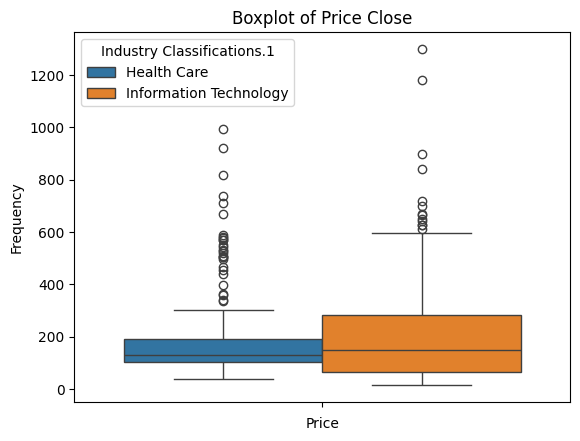

In [16]:
#box & whisker plot of price
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data = df, y = 'Price Close', hue = 'Industry Classifications.1')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Boxplot of Price Close')

Text(0.5, 1.0, 'Distribution of Price Close')

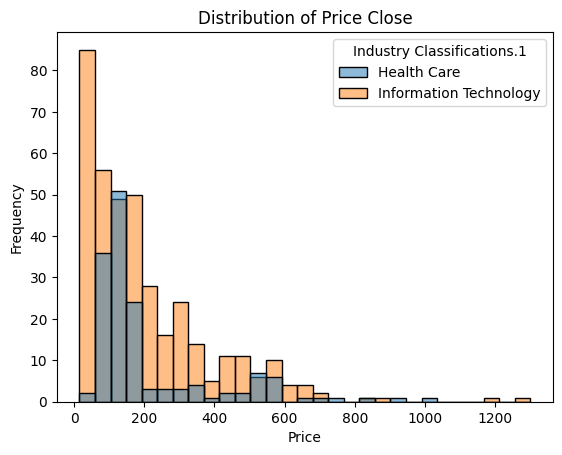

In [17]:
#histogram of price
sns.histplot(data = df, x = 'Price Close', hue = 'Industry Classifications.1')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price Close')

### Initial Visualization

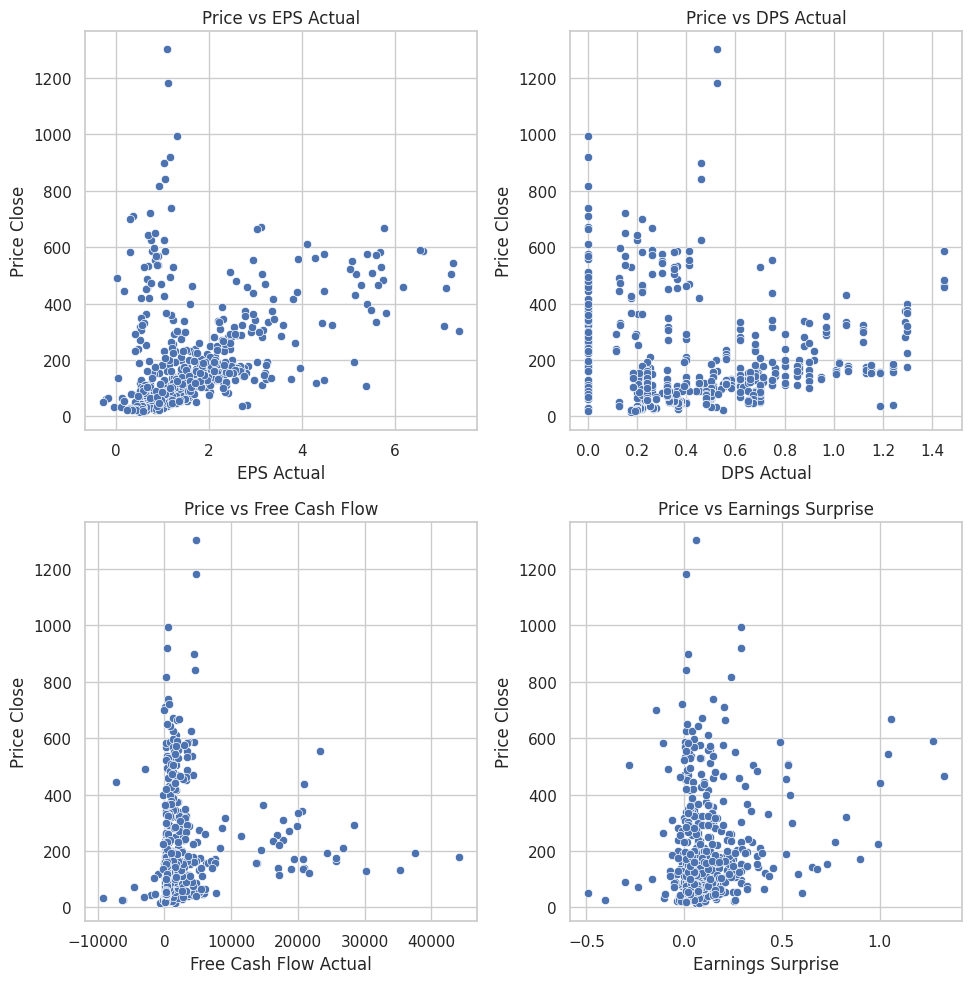

In [18]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))  # Adjust figsize to fit your screen or preferences


sns.scatterplot(data=df, x='EPS Actual', y='Price Close', ax=axs[0, 0]).set(title='Price vs EPS Actual')
sns.scatterplot(data=df, x='DPS Actual', y='Price Close', ax=axs[0, 1]).set(title='Price vs DPS Actual')
sns.scatterplot(data=df, x='Free Cash Flow Actual', y='Price Close', ax=axs[1, 0]).set(title='Price vs Free Cash Flow')
sns.scatterplot(data=df, x='Earnings Surprise', y='Price Close', ax=axs[1, 1]).set(title='Price vs Earnings Surprise')


plt.tight_layout()
plt.show()

## Modeling & Interpretations

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

### Baseline Model

In [20]:
y = df['Price Close']
baseline_preds = np.ones(len(y))*y.mean()
mean_squared_error(y, baseline_preds)

33735.74356161677

### Multiple Regression Model

In [21]:
#create correlation matrix to avoid multicolinearity
columns = ['DPS Actual', 'EPS Actual', 'Free Cash Flow Actual', 'Earnings Surprise', 'Price Close']
corr_matrix = df[columns].corr()
corr_matrix

,DPS Actual,EPS Actual,Free Cash Flow Actual,Earnings Surprise,Price Close
DPS Actual,1.000000,0.371816,0.002433,0.092480,-0.070849
EPS Actual,0.371816,1.000000,0.050787,0.481748,0.363034
Free Cash Flow Actual,0.002433,0.050787,1.000000,0.017287,0.058753
Earnings Surprise,0.092480,0.481748,0.017287,1.000000,0.166960
Price Close,-0.070849,0.363034,0.058753,0.166960,1.000000


In [22]:
#create X & y, split into training and testing data
X = df[['EPS Actual', 'DPS Actual', 'Free Cash Flow Actual','Earnings Surprise', 'Industry Classifications.1']]
y = df['Price Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [23]:
#encode categorical column & scale data
cat_col = ['Industry Classifications.1']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [24]:
#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', LinearRegression())])

In [25]:
#fit pipeline
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Industry '
                                                   'Classifications.1'])])),
                ('model', LinearRegression())])

In [26]:
#find coefficients
lr = pipe.named_steps['model']
coefficients = lr.coef_
names = transformer.get_feature_names_out()
pd.DataFrame(coefficients, names)

,0
onehotencoder__Industry Classifications.1_Information Technology,26.553840
remainder__EPS Actual,69.681096
remainder__DPS Actual,-139.884098
remainder__Free Cash Flow Actual,-0.000032
remainder__Earnings Surprise,-42.751161


In [27]:
#find y-int
lr.intercept_

133.12041234647614

In [28]:
import statsmodels.api as sm

# After fitting the pipeline
pipe.fit(X_train, y_train)

# Get the encoded and transformed data
X_train_transformed = pipe.named_steps['encode'].transform(X_train)

# Add a constant to the transformed data for the intercept term
X_train_transformed = sm.add_constant(X_train_transformed)

# Create and fit the statsmodels OLS model
ols_model = sm.OLS(y_train, X_train_transformed).fit()

# Print the model summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Price Close   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     20.62
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           2.04e-18
Time:                        08:56:25   Log-Likelihood:                -2759.6
No. Observations:                 423   AIC:                             5531.
Df Residuals:                     417   BIC:                             5555.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.1204     20.711      6.428      0.0

In [29]:
#calculate mse for training data
y_train_preds = pipe.predict(X_train)
mse = mean_squared_error(y_train, y_train_preds)
r_squared = pipe.score(X_train, y_train)
print(f'MSE: {round(mse, 2)}')
print(f'R-squared: {r_squared}')

MSE: 27168.05
R-squared: 0.19824308230189347


In [30]:
#calculate mse for testing data
y_test_preds = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_test_preds)
r_squared = pipe.score(X_test, y_test)
print(f'MSE: {round(mse, 2)}')
print(f'R-squared: {r_squared}')

MSE: 28847.06
R-squared: 0.12110262190569043


In [31]:
#determine feature importance
r = permutation_importance(pipe, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
EPS Actual,0.466328
DPS Actual,0.127757
Free Cash Flow Actual,-0.000287
Earnings Surprise,0.000451
Industry Classifications.1,0.002484


###K-Nearest Neighbors Regression Model




In [32]:
#create X & y, split into training and testing data
X = df[['EPS Actual', 'DPS Actual', 'Free Cash Flow Actual','Earnings Surprise', 'Industry Classifications.1']]
y = df['Price Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [33]:
#encode categorical column & scale data
cat_col = ['Industry Classifications.1']
scaler = StandardScaler()
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = scaler)

In [34]:
#create pipeline for knn regression model
pipe = Pipeline([('encode', transformer), ('model', KNeighborsRegressor())])

In [35]:
#define grid of hyperparameters for number of neighbors
param_grid = {'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]}

In [36]:
#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['Industry '
                                                                          'Classifications.1'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]},
             scoring='neg_mean_squared_error')

In [37]:
#determine best parameter
grid_search.best_params_

{'model__n_neighbors': 5}

In [38]:
#use 5 neighbors in model
knn = grid_search.best_estimator_

In [39]:
#calculate mse for training data
y_train_preds = knn.predict(X_train)
mse = mean_squared_error(y_train, y_train_preds)
r_squared = knn.score(X_train, y_train)
print(f'MSE: {round(mse, 2)}')
print(f'R-squared: {r_squared}')

MSE: 11693.31
R-squared: 0.6549183836190421


In [40]:
#calculate mse for testing data
y_test_preds = knn.predict(X_test)
mse = mean_squared_error(y_test, y_test_preds)
r_squared = knn.score(X_test, y_test)
print(f'MSE: {round(mse, 2)}')
print(f'R-squared: {r_squared}')

MSE: 10583.99
R-squared: 0.6775325174294193


In [41]:
#determine feature importance
r = permutation_importance(knn, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
EPS Actual,0.524927
DPS Actual,0.643532
Free Cash Flow Actual,0.531518
Earnings Surprise,0.313383
Industry Classifications.1,0.330344


### Random Forest Regression Model

In [42]:
#create X & y, split into training and testing data
X = df[['EPS Actual', 'DPS Actual', 'Free Cash Flow Actual','Earnings Surprise', 'Industry Classifications.1']]
y = df['Price Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [43]:
from sklearn.preprocessing import OneHotEncoder
cat_col = ['Industry Classifications.1']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [44]:
#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', RandomForestRegressor())])

In [45]:
#define grid of hyperparameters for number of estimators and max depth
param_grid = {'model__n_estimators': [50, 100, 150, 200],'model__max_depth': [3, 5, 7, 9]}

In [46]:
#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['Industry '
                                                                          'Classifications.1'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 5, 7, 9],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [47]:
#determine best parameters
grid_search.best_params_

{'model__max_depth': 7, 'model__n_estimators': 150}

In [48]:
#use max depth of 6 & 200 estimators in model
forest = grid_search.best_estimator_

In [49]:
#calculate mse for training data
y_train_preds = forest.predict(X_train)
mse = mean_squared_error(y_train, y_train_preds)
r_squared = forest.score(X_train, y_train)
print(f'MSE: {round(mse, 2)}')
print(f'R-squared: {r_squared}')

MSE: 4405.66
R-squared: 0.8699843057027649


In [50]:
#calculate mse for training data
y_test_preds = forest.predict(X_test)
mse = mean_squared_error(y_test, y_test_preds)
r_squared = forest.score(X_test, y_test)
print(f'MSE: {round(mse, 2)}')
print(f'R-squared: {r_squared}')

MSE: 14621.92
R-squared: 0.5545068134682609


### Finding Under and Over valued stocks using KNN model

In [51]:
# Create a dataset with only data from the most recent period ( last fiscal quarter)
df_1 = df[df['FQ -']==1]
X = df_1[['EPS Actual', 'DPS Actual', 'Free Cash Flow Actual','Earnings Surprise', 'Industry Classifications.1']]
predicted_prices = knn.predict(X)

# Create a series with the predictions and the test indices
predicted_prices_series = pd.Series(predicted_prices, index= df_1.index)

# Add this series to the original DataFrame
df_1.loc[df_1.index , 'Predicted_Price'] = predicted_prices_series

<ipython-input-51-d8b6c1e16499>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.loc[df_1.index , 'Predicted_Price'] = predicted_prices_series


In [52]:
df_1 = df_1[['Company Name', 'Tickers only', 'Industry Classifications.1', 'Price Close', 'Predicted_Price']]

In [53]:
df_1['Price_Diff'] = df_1['Predicted_Price'] - df_1['Price Close']

In [54]:
df_1.head()

,Company Name,Tickers only,Industry Classifications.1,Price Close,Predicted_Price,Price_Diff
38,Abbott Laboratories (NYSE:ABT),ABT,Health Care,114.01,106.772,-7.238
57,Accenture plc (NYSE:ACN),ACN,Information Technology,282.29,306.970,24.680
76,Adobe Inc. (NasdaqGS:ADBE),ADBE,Information Technology,574.41,549.960,-24.450
95,"Analog Devices, Inc. (NasdaqGS:ADI)",ADI,Information Technology,231.38,185.088,-46.292
114,Apple Inc. (NasdaqGS:AAPL),AAPL,Information Technology,210.62,150.188,-60.432


In [55]:
# Top 5 Undervalued Stocks
top_undervalued = df_1.sort_values(by='Price_Diff', ascending=False).head(5)

# Top 5 Overvalued Stocks
top_overvalued = df_1.sort_values(by='Price_Diff').head(5)

In [56]:
print("Top 5 Undervalued Stocks:")
top_undervalued

Top 5 Undervalued Stocks:


,Company Name,Tickers only,Industry Classifications.1,Price Close,Predicted_Price,Price_Diff
152,Broadcom Inc. (NasdaqGS:AVGO),AVGO,Information Technology,160.68,733.142,572.462
475,"Intuitive Surgical, Inc. (NasdaqGS:ISRG)",ISRG,Health Care,262.07,586.524,324.454
1007,Thermo Fisher Scientific Inc. (NYSE:TMO),TMO,Health Care,107.95,386.936,278.986
228,"Cisco Systems, Inc. (NasdaqGS:CSCO)",CSCO,Information Technology,46.98,152.278,105.298
399,HP Inc. (NYSE:HPQ),HPQ,Information Technology,23.46,122.224,98.764


In [57]:
print("\nTop 5 Overvalued Stocks:")
top_overvalued


Top 5 Overvalued Stocks:


,Company Name,Tickers only,Industry Classifications.1,Price Close,Predicted_Price,Price_Diff
551,"Juniper Networks, Inc. (NYSE:JNPR)",JNPR,Information Technology,698.57,275.144,-423.426
646,Medtronic plc (NYSE:MDT),MDT,Health Care,528.07,174.142,-353.928
665,Microchip Technology Incorporated (NasdaqGS:MCHP),MCHP,Information Technology,420.72,137.398,-283.322
684,Microsoft Corporation (NasdaqGS:MSFT),MSFT,Information Technology,555.79,312.058,-243.732
760,Oracle Corporation (NYSE:ORCL),ORCL,Information Technology,275.28,124.834,-150.446


### Company Time Series Model

In [58]:
import yfinance as yf

In [59]:
#Taking the most undervalued company Broadcom as an example to examine presence of auto-correlation
ticker = "AVGO"  # Replace with your desired ticker

# Download the data
data = yf.download(ticker, start="2019-01-01", end="2023-12-31") # Adjust start and end dates as needed

# Get the close price
close_price = data["Close"]

# Print the close price data
print(close_price)

[*********************100%***********************]  1 of 1 completed

Ticker            AVGO
Date                  
2019-01-02   25.351000
2019-01-03   23.096001
2019-01-04   23.323000
2019-01-07   23.798000
2019-01-08   23.607000
...                ...
2023-12-22  112.197998
2023-12-26  113.189003
2023-12-27  112.616997
2023-12-28  112.240997
2023-12-29  111.625000

[1258 rows x 1 columns]


In [60]:
!pip install sktime[all_extras]
from statsmodels.graphics.tsaplots import plot_acf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.7/953.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [61]:
from sktime.transformations.series.difference import Differencer
differencer = Differencer()
bc_diff = differencer.fit_transform(close_price)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


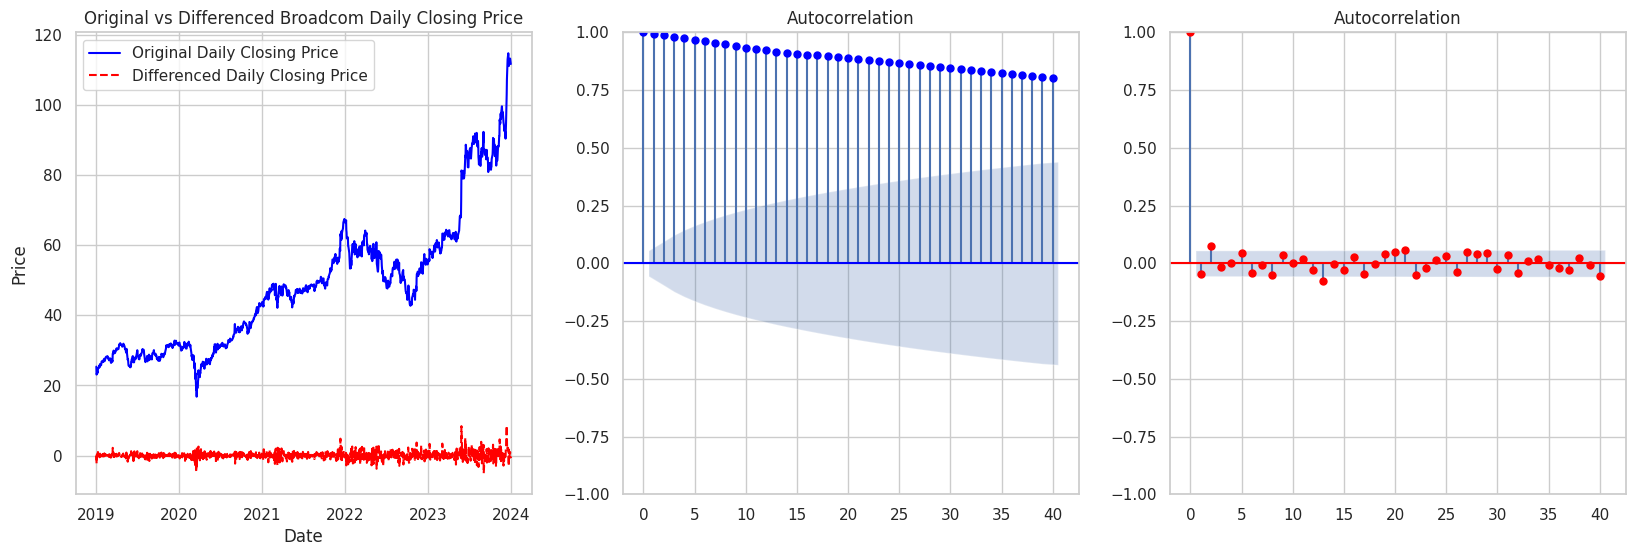

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].plot(close_price, label='Original Daily Closing Price', color='blue')
axes[0].plot(bc_diff, label='Differenced Daily Closing Price', color='red', linestyle='--')
axes[0].set_title('Original vs Differenced Broadcom Daily Closing Price')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].legend()

# Plot autocorrelation for original data
axes[1].set_title('Autocorrelation of Original Daily Closing Price')
plot_acf(close_price, lags=40, ax=axes[1], color='blue')

# Plot autocorrelation for differenced data
axes[2].set_title('Autocorrelation of Differenced Daily Closing Price')
plot_acf(bc_diff, lags=40, ax=axes[2], color='red')

plt.show()